# RFM분석
* 아래의 세 요소를 따라 분류 및 평가하는 분석
* Recency :얼마나 최근에 구매 했는가
* Frequency : 얼마나 자주 구매 했는가
* Monetary: 얼마나 지출 했는가
---
## RFM분석의 분류
* 충성도(상기 요소를 종합적으로 고려)에 따른 분류
* 구매 빈도에 따른 분류
* 지출금액에 따른 분류
* 이외에도 주관적으로 분류 기준 수립이 가능
* 정해진 기준이 없어 자유롭게 분류 가능
* 주관에 따르지만 이를 뒷받침하는 근거가 필요함

## RFM분석 실습을 위한 데이터 추출
* 상품명 - 판매건수
    * 상품별 판매량


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [70]:
df = pd.read_csv('C:/Users/user/Desktop/230102~/실습 데이터/(주)강원랜드_일자별 호텔 미니바 판매현황_20211231.csv', encoding= 'cp949')
df1 = df.copy()

In [4]:
df['상품명'].unique()

array(['양주A세트(스)', '하이네켄', '카스', '육포', '콜라', '에비앙', '컨디션', '믹스넛', '치솔',
       '치약', '면도기', '생수(판매용)', '세면용품세트', '마스크', '게토레이', '양말', '쉐이크', '런닝',
       '팬티', '객실 슬리퍼', '인형(30cm)', '인형(50cm)', '쉐이크(특)', '타올세트',
       '신규하이하우30cm', '직원용 베개', '직원용 이불(퀸)', '직원용 이불(싱글)', '신규하이하우50cm',
       '고객용 베개', '고객용 이불(퀸)', '고객용 이불(싱글)', '맥주세트', '(명절) 베개',
       '(명절) 이불(퀸)', '(명절)타올세트', '(명절) 이불(싱글)', '목욕가운(대)', '목욕가운(대/특)',
       '.', '게토레이(손)', '에비앙(손)', '스타벅스(더블샷)', '토레스 감자칩', '노아주스(망고스무디)',
       '로리나(레모네이드)', '노아주스(망고라임)', '로리나(핑크)', '게토레이(캔)', '아렌시아(욕실용품)',
       '(AI)콜라', '(AI)칸타타(라떼)', '(AI)랭거스 망고', '(AI)게토레이(캔)', '(AI)치솔',
       '(AI)치약', '(AI)하이네캔', '(AI)로리나(핑크)', '(AI)로리나(레모네이드)', '(AI)카스',
       '(AI)믹스너트', '(AI)면도기', '(AI)스타벅스(파이크)', '(AI)에비앙 생수', '(AI)컨디션',
       '(AI)스타벅스(더블샷)', '(AI)노아주스(망고스무디)', '(AI)랭거스 자몽', '(AI)토레스 감자칩',
       '(AI)양말', '(AI)노아주스(망고라임)', '(AI)칸타타(카라멜)'], dtype=object)

상품별 판매건수

In [6]:
df[df['상품명'] == '양주A세트(스)']['판매건수'].sum()

47

In [35]:
list1= []
for x in df['상품명'].unique():
    m = df['상품명'] == x
    temp=df[m]
    res = temp['판매건수'].sum()
    list1.append([x,res])


영업일자별 판매건수

In [28]:
df['영업일자'].unique()

array(['2021-02-15', '2021-02-16', '2021-02-17', '2021-02-18',
       '2021-02-19', '2021-02-20', '2021-02-21', '2021-02-22',
       '2021-02-23', '2021-02-24', '2021-02-25', '2021-02-26',
       '2021-02-27', '2021-02-28', '2021-03-01', '2021-03-02',
       '2021-03-03', '2021-03-04', '2021-03-05', '2021-03-06',
       '2021-03-07', '2021-03-08', '2021-03-09', '2021-03-10',
       '2021-03-11', '2021-03-12', '2021-03-13', '2021-03-14',
       '2021-03-15', '2021-03-16', '2021-03-17', '2021-03-18',
       '2021-03-19', '2021-03-20', '2021-03-21', '2021-03-22',
       '2021-03-23', '2021-03-24', '2021-03-25', '2021-03-26',
       '2021-03-27', '2021-03-28', '2021-03-29', '2021-03-30',
       '2021-03-31', '2021-04-01', '2021-04-02', '2021-04-03',
       '2021-04-04', '2021-04-05', '2021-04-06', '2021-04-07',
       '2021-04-08', '2021-04-09', '2021-04-10', '2021-04-11',
       '2021-04-12', '2021-04-13', '2021-04-14', '2021-04-15',
       '2021-04-16', '2021-04-17', '2021-04-18', '2021-

In [34]:
list2= []
for x in df['영업일자'].unique():
    m = df['영업일자'] == x
    temp=df[m]
    res = temp['판매건수'].sum()
    list2.append([x,res])
list2

[['2021-02-15', 1],
 ['2021-02-16', 95],
 ['2021-02-17', 150],
 ['2021-02-18', 108],
 ['2021-02-19', 141],
 ['2021-02-20', 214],
 ['2021-02-21', 232],
 ['2021-02-22', 119],
 ['2021-02-23', 125],
 ['2021-02-24', 112],
 ['2021-02-25', 158],
 ['2021-02-26', 161],
 ['2021-02-27', 152],
 ['2021-02-28', 311],
 ['2021-03-01', 211],
 ['2021-03-02', 120],
 ['2021-03-03', 116],
 ['2021-03-04', 102],
 ['2021-03-05', 85],
 ['2021-03-06', 139],
 ['2021-03-07', 191],
 ['2021-03-08', 109],
 ['2021-03-09', 102],
 ['2021-03-10', 126],
 ['2021-03-11', 97],
 ['2021-03-12', 173],
 ['2021-03-13', 157],
 ['2021-03-14', 177],
 ['2021-03-15', 148],
 ['2021-03-16', 104],
 ['2021-03-17', 134],
 ['2021-03-18', 133],
 ['2021-03-19', 131],
 ['2021-03-20', 130],
 ['2021-03-21', 126],
 ['2021-03-22', 90],
 ['2021-03-23', 79],
 ['2021-03-24', 80],
 ['2021-03-25', 113],
 ['2021-03-26', 80],
 ['2021-03-27', 142],
 ['2021-03-28', 191],
 ['2021-03-29', 90],
 ['2021-03-30', 94],
 ['2021-03-31', 88],
 ['2021-04-01', 96],
 

In [39]:
# 상품명 - 판매건수 저장
df2 = pd.DataFrame(list1,columns=['상품명','판매건수'])
df3 = pd.DataFrame(list2,columns=['영업일자','판매건수'])

### RFM분석 실습
---
* 아래 데이터를 이용해서 분석한다
    1. 가장 마지막 날짜에 가까운 정도
    1. 날짜별 판매량 또는 상품명 마스킹 결과에서 날짜의 개수
    1. 판매건수

In [62]:
m = df['영업일자'] == '2021-12-31'
df[m].sort_values('판매건수',ascending= False)

,영업일자,상품명,판매건수
4869,2021-12-31,치솔,37
4864,2021-12-31,카스,23
4870,2021-12-31,치약,23
4865,2021-12-31,콜라,15
4863,2021-12-31,하이네켄,12
4868,2021-12-31,믹스넛,6
4866,2021-12-31,에비앙,5
4875,2021-12-31,게토레이(캔),4
4867,2021-12-31,컨디션,1
4871,2021-12-31,면도기,1


In [65]:
df.sort_values('판매건수',ascending= False)

,영업일자,상품명,판매건수
3485,2021-10-06,게토레이(손),262
4812,2021-12-26,치솔,80
194,2021-02-28,치솔,77
4613,2021-12-12,치솔,71
1703,2021-06-13,치솔,71
...,...,...,...
2038,2021-07-05,직원용 베개,0
1544,2021-06-01,믹스넛,0
3565,2021-10-12,인형(30cm),-1
3849,2021-10-31,노아주스(망고스무디),-1


In [71]:
n = df['영업일자'].apply(lambda x :int(x.split('-')[1]))
df1['영업_month'] = n

In [74]:
o= df['영업일자'].apply(lambda x :int(x.split('-')[2]))
df1['영업_day'] = o

In [106]:
p = df1['영업_month']>=5
q = df1['영업_month']<=10
r = df1['영업_month']==12
df1_a= df1[p&q|r] # 성수기 마스킹
df1_b =df1[~(p&q|r)] # 비성수기 마스킹

In [128]:
df1_a

,영업일자,상품명,판매건수,영업_month,영업_day
1104,2021-05-01,하이네켄,19,5,1
1105,2021-05-01,카스,15,5,1
1106,2021-05-01,육포,6,5,1
1107,2021-05-01,콜라,8,5,1
1108,2021-05-01,에비앙,5,5,1
...,...,...,...,...,...
4872,2021-12-31,양말,1,12,31
4873,2021-12-31,객실 슬리퍼,0,12,31
4874,2021-12-31,세면용품세트,1,12,31
4875,2021-12-31,게토레이(캔),4,12,31


In [122]:

list2= []
for x in df1_a['상품명'].unique():
    m = df1_a['상품명'] == x
    temp=df1_a[m]
    res = temp['판매건수'].sum()
    list2.append([x,res])

dfa_product=pd.DataFrame(list2,columns = ['상품명','판매건수'])

In [131]:
dfa_product.sort_values('판매건수',ascending= False).head(5)

,상품명,판매건수
7,치솔,6570
13,세면용품세트,4859
8,치약,4414
1,카스,4147
0,하이네켄,2629


In [152]:

list3 =  []
for x in df1_a['영업_month'].unique():
    for y in df1_a['상품명'].unique():
        m = df1_a['영업_month'] == x
        n = df1_a['상품명'] == y
        temp=df1_a[m][n]
        res = temp['판매건수'].sum()
        list3.append([x,y,res])

dfa_5=pd.DataFrame(list3,columns=['영업_month','물품명','판매건수'])

C:\Users\user\AppData\Local\Temp\ipykernel_15284\2170125398.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp=df1_a[m][n]


In [157]:
dfa_5.sort_values(['영업_month','판매건수'],ascending=[True,False])

,영업_month,물품명,판매건수
7,5,치솔,711
13,5,세면용품세트,549
8,5,치약,498
1,5,카스,435
0,5,하이네켄,425
...,...,...,...
322,12,토레스 감자칩,0
323,12,노아주스(망고스무디),0
324,12,로리나(레모네이드),0
325,12,노아주스(망고라임),0


In [124]:
list2= []
for x in df1_b['상품명'].unique():
    m = df1_b['상품명'] == x
    temp=df1_b[m]
    res = temp['판매건수'].sum()
    list2.append([x,res])

dfb_product=pd.DataFrame(list2,columns = ['상품명','판매건수'])

In [127]:
dfb_product.sort_values('판매건수',ascending= False).head(5)

,상품명,판매건수
8,치솔,2670
12,세면용품세트,2243
9,치약,1830
2,카스,1810
1,하이네켄,1235


In [164]:

list4 =  []
for x in df1_b['영업_month'].unique():
    for y in df1_b['상품명'].unique():
        m = df1_b['영업_month'] == x
        n = df1_b['상품명'] == y
        temp=df1_b[m][n]
        res = temp['판매건수'].sum()
        list4.append([x,y,res])

dfb_2=pd.DataFrame(list4,columns=['영업_month','물품명','판매건수'])

C:\Users\user\AppData\Local\Temp\ipykernel_15284\4163962674.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp=df1_b[m][n]


In [165]:
dfb_2.sort_values(['영업_month','판매건수'],ascending=[True,False])

,영업_month,물품명,판매건수
8,2,치솔,419
9,2,치약,296
2,2,카스,269
12,2,세면용품세트,205
1,2,하이네켄,162
...,...,...,...
180,11,양주A세트(스),0
193,11,마스크,0
196,11,쉐이크,0
202,11,쉐이크(특),0


실습_T

In [166]:
df['영업일자'] = df['영업일자'].apply(lambda x: pd.Timestamp(x))

In [167]:
df.loc[4876,'영업일자'] - df.loc[4800,'영업일자']

Timedelta('6 days 00:00:00')

In [169]:
df['영업일자'].unique() # 2021.2.15 ~ 2021.12.31

array(['2021-02-15T00:00:00.000000000', '2021-02-16T00:00:00.000000000',
       '2021-02-17T00:00:00.000000000', '2021-02-18T00:00:00.000000000',
       '2021-02-19T00:00:00.000000000', '2021-02-20T00:00:00.000000000',
       '2021-02-21T00:00:00.000000000', '2021-02-22T00:00:00.000000000',
       '2021-02-23T00:00:00.000000000', '2021-02-24T00:00:00.000000000',
       '2021-02-25T00:00:00.000000000', '2021-02-26T00:00:00.000000000',
       '2021-02-27T00:00:00.000000000', '2021-02-28T00:00:00.000000000',
       '2021-03-01T00:00:00.000000000', '2021-03-02T00:00:00.000000000',
       '2021-03-03T00:00:00.000000000', '2021-03-04T00:00:00.000000000',
       '2021-03-05T00:00:00.000000000', '2021-03-06T00:00:00.000000000',
       '2021-03-07T00:00:00.000000000', '2021-03-08T00:00:00.000000000',
       '2021-03-09T00:00:00.000000000', '2021-03-10T00:00:00.000000000',
       '2021-03-11T00:00:00.000000000', '2021-03-12T00:00:00.000000000',
       '2021-03-13T00:00:00.000000000', '2021-03-14

In [176]:
t11 = pd.Timestamp('2021-01-01')
t41 = pd.Timestamp('2021-04-01')
t71 = pd.Timestamp('2021-07-01')
t101 = pd.Timestamp('2021-10-01')

In [184]:
# 1사분기 구하기
query_expr = '@t11 <=영업일자< @t41'
ind1 = df.query(query_expr).index

In [185]:
# 2사분기 구하기
query_expr = '@t41 <=영업일자< @t71'
ind2 = df.query(query_expr).index

In [186]:
# 3사분기 구하기
query_expr = '@t71 <=영업일자< @t101'
ind3 = df.query(query_expr).index

In [187]:
# 4사분기 구하기
query_expr = '@t101 <=영업일자'
ind4 = df.query(query_expr).index

In [188]:
df['날짜점수'] = 0


,영업일자,상품명,판매건수,날짜점수
0,2021-02-15,양주A세트(스),1,0
1,2021-02-16,하이네켄,4,0
2,2021-02-16,카스,6,0
3,2021-02-16,육포,5,0
4,2021-02-16,콜라,6,0
...,...,...,...,...
665,2021-03-31,타올세트,1,0
666,2021-03-31,생수(판매용),2,0
667,2021-03-31,세면용품세트,14,0
668,2021-03-31,마스크,1,0


In [191]:
for i in df.index: # 인덱스 기준으로 루프
    # df.loc[i,'영업일자']가 몇사분기 인지 판단
    # 1~4분기에서 각각 분기에 25점씩 증가하도록 차등적으로 날짜점수를 매김
    if df.loc[i,'영업일자']<pd.Timestamp('2021-04-01'):    
        df.loc[i,'날짜점수'] = 25
    elif df.loc[i,'영업일자']<pd.Timestamp('2021-07-01'):    
        df.loc[i,'날짜점수'] = 50
    elif df.loc[i,'영업일자']<pd.Timestamp('2021-10-01'):    
        df.loc[i,'날짜점수'] = 75
    else:
        df.loc[i,'날짜점수'] = 100
    

In [194]:
m= df['상품명'] =='양주A세트(스)'
df[m]

,영업일자,상품명,판매건수,날짜점수
0,2021-02-15,양주A세트(스),1,25
15,2021-02-16,양주A세트(스),4,25
30,2021-02-17,양주A세트(스),2,25
46,2021-02-18,양주A세트(스),8,25
62,2021-02-19,양주A세트(스),2,25
80,2021-02-20,양주A세트(스),10,25
95,2021-02-21,양주A세트(스),8,25
110,2021-02-22,양주A세트(스),3,25
139,2021-02-24,양주A세트(스),4,25
154,2021-02-25,양주A세트(스),5,25


In [195]:
df['빈도점수'] = 0

In [198]:
df[m].shape[0] #row개수 = 빈도

11

In [200]:
df[m]['빈도점수']=df[m].shape[0]

C:\Users\user\AppData\Local\Temp\ipykernel_15284\735901459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[m]['빈도점수']=df[m].shape[0]


In [205]:
for i in df.index:
    name = df.loc[i,'상품명']
    m = df['상품명'] == name
    res = df[m].shape[0]
    
    res = df.loc[i,'빈도점수']
    
    

In [206]:
df

,영업일자,상품명,판매건수,날짜점수,빈도점수
0,2021-02-15,양주A세트(스),1,25,11
1,2021-02-16,하이네켄,4,25,307
2,2021-02-16,카스,6,25,317
3,2021-02-16,육포,5,25,286
4,2021-02-16,콜라,6,25,316
...,...,...,...,...,...
4872,2021-12-31,양말,1,100,257
4873,2021-12-31,객실 슬리퍼,0,100,12
4874,2021-12-31,세면용품세트,1,100,307
4875,2021-12-31,게토레이(캔),4,100,54


In [207]:
df['가격점수'] = 0

In [209]:
df

,영업일자,상품명,판매건수,날짜점수,빈도점수,가격점수
0,2021-02-15,양주A세트(스),1,25,11,0
1,2021-02-16,하이네켄,4,25,307,0
2,2021-02-16,카스,6,25,317,0
3,2021-02-16,육포,5,25,286,0
4,2021-02-16,콜라,6,25,316,0
...,...,...,...,...,...,...
4872,2021-12-31,양말,1,100,257,0
4873,2021-12-31,객실 슬리퍼,0,100,12,0
4874,2021-12-31,세면용품세트,1,100,307,0
4875,2021-12-31,게토레이(캔),4,100,54,0


In [210]:
for i in df.index:
    name = df.loc[i,'상품명']
    m = df['상품명'] == name
    res = df[m]['판매건수'].sum()
    
    df.loc[i,'가격점수'] = res
    

In [211]:
df

,영업일자,상품명,판매건수,날짜점수,빈도점수,가격점수
0,2021-02-15,양주A세트(스),1,25,11,47
1,2021-02-16,하이네켄,4,25,307,3864
2,2021-02-16,카스,6,25,317,5957
3,2021-02-16,육포,5,25,286,1575
4,2021-02-16,콜라,6,25,316,2118
...,...,...,...,...,...,...
4872,2021-12-31,양말,1,100,257,716
4873,2021-12-31,객실 슬리퍼,0,100,12,16
4874,2021-12-31,세면용품세트,1,100,307,7102
4875,2021-12-31,게토레이(캔),4,100,54,157


In [212]:
df['빈도점수'].min() #1 ~319

1

In [214]:
df['빈도점수'] = df['빈도점수']/df['빈도점수'].max()*100 # 빈도점수 스케일링 1~100사이

In [215]:
df['가격점수'] = df['가격점수']/df['가격점수'].max()*100 # 가격점수 스케일링 1~100사이

In [217]:
df['합계점수'] = df['날짜점수'] + df['빈도점수']+df['가격점수'] # 빈도,가격,날짜점수 덧셈

In [220]:
df11 = df.sort_values('합계점수',ascending=False) # df11에 저장

In [221]:
df11.drop_duplicates('상품명')# 상품명을 기준으로 중복값 제거

,영업일자,상품명,판매건수,날짜점수,빈도점수,가격점수,합계점수
4435,2021-11-30,치솔,25,100,100.000000,100.000000,300.000000
4561,2021-12-08,세면용품세트,43,100,96.238245,76.861472,273.099716
3775,2021-10-27,치약,26,100,100.000000,67.575758,267.575758
4750,2021-12-22,카스,33,100,99.373041,64.469697,263.842738
3852,2021-11-01,하이네켄,6,100,96.238245,41.818182,238.056426
...,...,...,...,...,...,...,...
3139,2021-09-13,목욕가운(대),1,75,0.313480,0.010823,75.324302
728,2021-04-04,마스크,1,50,19.749216,1.363636,71.112853
263,2021-03-04,쉐이크(특),10,25,3.761755,1.374459,30.136214
95,2021-02-21,양주A세트(스),8,25,3.448276,0.508658,28.956934


데이터 프레임 병합하기
* merge, join으로 표현하기도 한다

In [223]:
a = df[['상품명','빈도점수']]

In [224]:
b = df[['상품명','가격점수']]

In [227]:
# 상품명으로 합치기
# pd.merge(왼쪽df,오른쪽df,left_on = 왼쪽df 기준이 되는 컬럼, right_on = 오른쪽df의 기준이 되는 컬럼)
pd.merge(a,b,left_on='상품명',right_on='상품명').drop_duplicates('상품명') # merge를 사용하면 중복이 생기는 경우가 발생하기 때문에 중복제거 하는것을 권장함

,상품명,빈도점수,가격점수
0,양주A세트(스),3.448276,0.508658
121,하이네켄,96.238245,41.818182
94370,카스,99.373041,64.469697
194859,육포,89.655172,17.045455
276655,콜라,99.059561,22.922078
...,...,...,...
1186465,(AI)랭거스 자몽,0.940439,0.054113
1186474,(AI)토레스 감자칩,0.626959,0.054113
1186478,(AI)양말,0.940439,0.021645
1186487,(AI)노아주스(망고라임),0.313480,0.010823


In [230]:
pd.merge(a,b,left_index=True,right_index=True)

,상품명_x,빈도점수,상품명_y,가격점수
0,양주A세트(스),3.448276,양주A세트(스),0.508658
1,하이네켄,96.238245,하이네켄,41.818182
2,카스,99.373041,카스,64.469697
3,육포,89.655172,육포,17.045455
4,콜라,99.059561,콜라,22.922078
...,...,...,...,...
4872,양말,80.564263,양말,7.748918
4873,객실 슬리퍼,3.761755,객실 슬리퍼,0.173160
4874,세면용품세트,96.238245,세면용품세트,76.861472
4875,게토레이(캔),16.927900,게토레이(캔),1.699134


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

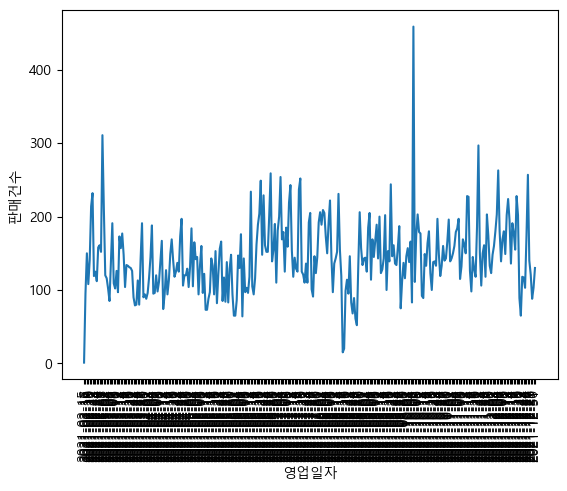

In [235]:
sns.lineplot(data = df3, x = '영업일자', y ='판매건수') # 기계학습에서 LSTM모델에서 이용됨> 추이를 통해 미래예측 가능(외부요인은 예측하지 못하기 때문에, 외부요인이 작용되는 상황에선 적용불가)
plt.xticks(rotation = 90) # reg그래프의 추세와 다른추세(데이터의 모양 ex)등락)